In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
lats = np.random.uniform(-90, 90, size=1500)
lngs = np.random.uniform(-180, 180, size=1500)
lat_lngs = zip(lats,lngs)
lat_lngs

In [26]:
coordinates = list(lat_lngs)

In [27]:
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-79.37802174389088 122.81501927975114
76.71837409704312 -96.93575597260458
-8.29365506308794 134.40653432038562
72.91277729559835 151.46260784715463
82.52041063761837 -111.27178719737215
-71.60376464881091 42.76872356825044
26.84542562368344 -53.645438953298466
-12.568957273619247 -169.43995933898313
-9.268090413082192 -98.0851498269808
-32.334344197853156 15.042332181185714
-56.19382395045485 76.23305001998904
-89.18600132363592 -100.77402775654366
40.419000197268474 -135.0839864852465
15.80610565541906 -162.2561017093664
23.5840858954311 -31.528700068771144
48.98212566030031 -23.030037523114487
21.772601516291644 -140.83703391304377
-12.918962029263085 85.14426296624839
-38.86806501683049 -71.40246523146405
66.70719611229177 172.9438355853692
-83.3057043514848 -142.11244271414174
-30.987664828690725 0.2610437176781488
-11.4744663379593 134.9295040830691
32.08041730039541 131.4281730997356
-25.716578376590903 -84.86402792825868
79.43159699664383 171.67641589385119
-70.81539419883842 -

In [28]:
from citipy import citipy

In [29]:
cities = []
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    if city not in cities:
        cities.append(city)
len(cities)

608

In [30]:
import requests

In [31]:
from config import weather_api_key

In [32]:
import time
from datetime import datetime

In [33]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [34]:
city_data = []
print("Beginning Data Retrieval     ")
print("-----------------------------")

record_count = 1
set_count = 1

for i, city in enumerate(cities):
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
    
    city_url = url + "&q=" + city.replace(" ","+")
    
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    record_count += 1
    try:
        city_weather= requests.get(city_url).json()
        city_lat= city_weather['coord']['lat']
        city_lng=city_weather['coord']['lon']
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')
        city_data.append({'City': city.title(),
                         'Lat':city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness":city_clouds,
                         'Wind Speed': city_wind,
                         "Country": city_country,
                         "Date": city_date})
    except:
        print("City not found. Skipping...")
        pass
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | new norfolk
Processing Record 2 of Set 1 | thompson
Processing Record 3 of Set 1 | tual
Processing Record 4 of Set 1 | chokurdakh
Processing Record 5 of Set 1 | yellowknife
Processing Record 6 of Set 1 | port alfred
Processing Record 7 of Set 1 | codrington
Processing Record 8 of Set 1 | samusu
City not found. Skipping...
Processing Record 9 of Set 1 | puerto ayora
Processing Record 10 of Set 1 | saldanha
Processing Record 11 of Set 1 | souillac
Processing Record 12 of Set 1 | punta arenas
Processing Record 13 of Set 1 | eureka
Processing Record 14 of Set 1 | kapaa
Processing Record 15 of Set 1 | ponta do sol
Processing Record 16 of Set 1 | praia da vitoria
Processing Record 17 of Set 1 | hilo
Processing Record 18 of Set 1 | hithadhoo
Processing Record 19 of Set 1 | vilcun
Processing Record 20 of Set 1 | komsomolskiy
Processing Record 21 of Set 1 | mataura
Processing Record 22 of Set 1 | luderitz

City not found. Skipping...
Processing Record 33 of Set 4 | zhuhai
Processing Record 34 of Set 4 | cap malheureux
Processing Record 35 of Set 4 | cidreira
Processing Record 36 of Set 4 | leshukonskoye
Processing Record 37 of Set 4 | karratha
Processing Record 38 of Set 4 | saint george
Processing Record 39 of Set 4 | yatou
Processing Record 40 of Set 4 | geraldton
Processing Record 41 of Set 4 | bubaque
Processing Record 42 of Set 4 | shasta lake
Processing Record 43 of Set 4 | gigmoto
Processing Record 44 of Set 4 | sentyabrskiy
City not found. Skipping...
Processing Record 45 of Set 4 | andapa
Processing Record 46 of Set 4 | phayakkhaphum phisai
Processing Record 47 of Set 4 | palivere
Processing Record 48 of Set 4 | prabumulih
Processing Record 49 of Set 4 | port hardy
Processing Record 50 of Set 4 | ihosy
Processing Record 1 of Set 5 | dunedin
Processing Record 2 of Set 5 | pontianak
Processing Record 3 of Set 5 | la macarena
Processing Record 4 of Set 5 | castro
Processing Record 

Processing Record 24 of Set 8 | boyabat
Processing Record 25 of Set 8 | wanaka
Processing Record 26 of Set 8 | bosaso
Processing Record 27 of Set 8 | nantucket
Processing Record 28 of Set 8 | esso
Processing Record 29 of Set 8 | genhe
Processing Record 30 of Set 8 | dankaur
Processing Record 31 of Set 8 | saint anthony
Processing Record 32 of Set 8 | oussouye
Processing Record 33 of Set 8 | lakes entrance
Processing Record 34 of Set 8 | san policarpo
Processing Record 35 of Set 8 | kandalaksha
Processing Record 36 of Set 8 | nguiu
City not found. Skipping...
Processing Record 37 of Set 8 | villena
Processing Record 38 of Set 8 | kitui
Processing Record 39 of Set 8 | santiago
Processing Record 40 of Set 8 | pisco
Processing Record 41 of Set 8 | arraial do cabo
Processing Record 42 of Set 8 | adrar
Processing Record 43 of Set 8 | ulladulla
Processing Record 44 of Set 8 | kabin buri
Processing Record 45 of Set 8 | hasaki
Processing Record 46 of Set 8 | pitimbu
Processing Record 47 of Set 

Processing Record 10 of Set 12 | puerto del rosario
Processing Record 11 of Set 12 | olinda
Processing Record 12 of Set 12 | longonjo
Processing Record 13 of Set 12 | port lincoln
Processing Record 14 of Set 12 | namibe
Processing Record 15 of Set 12 | port macquarie
Processing Record 16 of Set 12 | seoul
Processing Record 17 of Set 12 | samarai
Processing Record 18 of Set 12 | mayo
Processing Record 19 of Set 12 | shache
Processing Record 20 of Set 12 | xai-xai
Processing Record 21 of Set 12 | mogadishu
Processing Record 22 of Set 12 | christchurch
Processing Record 23 of Set 12 | setermoen
Processing Record 24 of Set 12 | teya
Processing Record 25 of Set 12 | duki
Processing Record 26 of Set 12 | galgani
City not found. Skipping...
Processing Record 27 of Set 12 | mrirt
City not found. Skipping...
Processing Record 28 of Set 12 | tessalit
Processing Record 29 of Set 12 | dunmore town
Processing Record 30 of Set 12 | palmonostora
Processing Record 31 of Set 12 | ghanzi
Processing Reco

In [3]:
city_data_df = pd.DataFrame(city_data)
city_data_df

NameError: name 'pd' is not defined

In [1]:
new_column_order = ['City', 'Country', 'Date', 'Lat','Lng','Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']

In [2]:
city_data_df = city_data_df[new_column_order]
city_data_df

NameError: name 'city_data_df' is not defined

In [38]:
output_data_file = 'weather_data/cities.csv'
city_data_df.to_csv(output_data_file, index_label='City_ID')

In [39]:
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

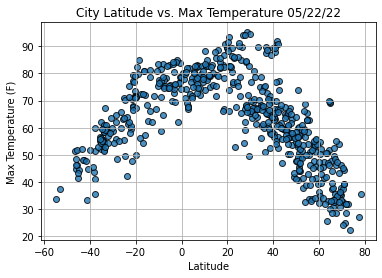

In [40]:
plt.scatter(lats,
           max_temps,
           edgecolor='black', linewidths=1, marker='o',
           alpha=0.8, label='Cities')
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig('weather_data/Fig1.png')
plt.show()

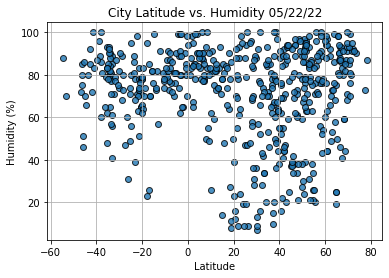

In [41]:
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")


plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("weather_data/Fig2.png")

plt.show()

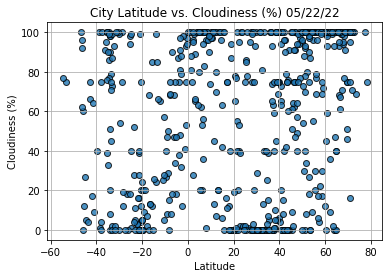

In [42]:
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")


plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("weather_data/Fig3.png")

plt.show()

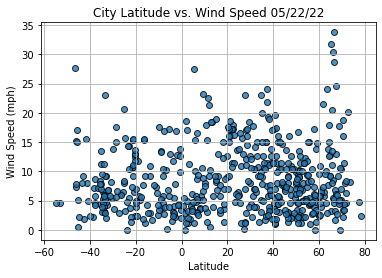

In [43]:
plt.scatter(lats,
           wind_speed,
           edgecolor='black',linewidths=1,marker='o',
           alpha=0.8, label='Cities')

plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("weather_data/Fig4.png")

plt.show()

In [44]:
from scipy.stats import linregress

In [45]:
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    regress_values = x_values * slope + intercept

    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")

    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [46]:
index13 = city_data_df.loc[13]
index13

City                 Ponta Do Sol
Country                        PT
Date          2022-05-22 22:00:38
Lat                       32.6667
Lng                         -17.1
Max Temp                    67.12
Humidity                       74
Cloudiness                     13
Wind Speed                   3.91
Name: 13, dtype: object

In [47]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Thompson,CA,2022-05-22 22:00:22,55.7435,-97.8558,62.76,20,100,14.97
3,Chokurdakh,RU,2022-05-22 22:03:33,70.6333,147.9167,32.56,99,100,2.17
4,Yellowknife,CA,2022-05-22 22:00:19,62.4560,-114.3525,41.43,49,100,5.73
11,Eureka,US,2022-05-22 22:00:13,40.8021,-124.1637,63.19,75,73,7.00
12,Kapaa,US,2022-05-22 22:03:36,22.0752,-159.3190,80.47,78,20,11.50


In [48]:
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

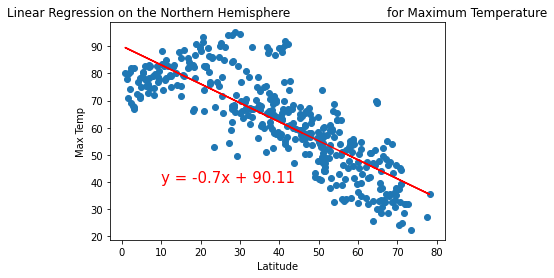

In [49]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

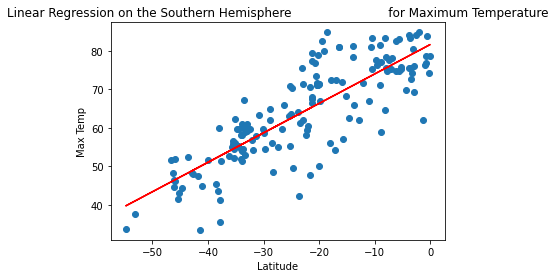

In [50]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

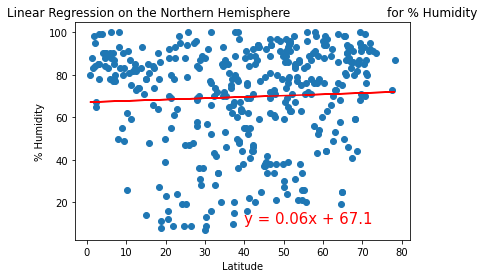

In [51]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

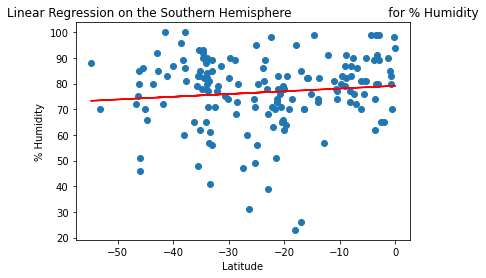

In [52]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

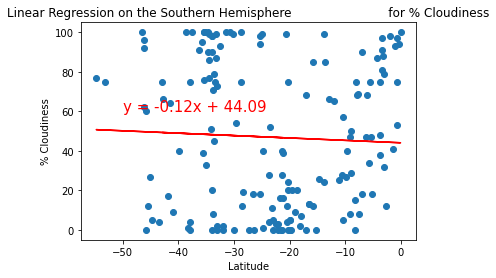

In [53]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

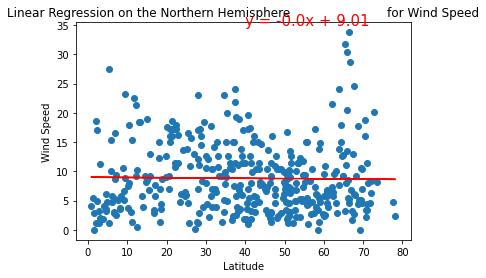

In [54]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

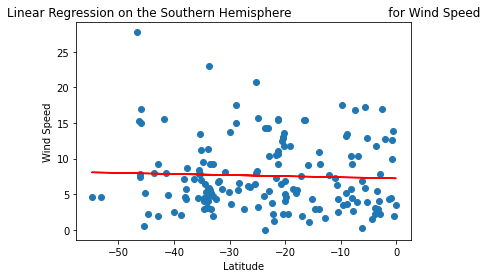

In [55]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))